# Biblioteca

In [1]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dados

In [3]:
dados = pd.read_csv("porto_seguro.csv")
dados.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Divisão entre treino e teste

In [4]:
from sklearn.model_selection import train_test_split
dados_treino, dados_teste = train_test_split(dados, random_state=37, test_size=0.3)

# Previsão

In [5]:
X_treino = dados_treino.drop(["id", "target"], 1)
y_treino = np.array(dados_treino.target)

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = np.array(dados_teste.target)

In [14]:
from xgboost import XGBClassifier

model = XGBClassifier()

# Resultados

In [33]:
from sklearn.metrics import roc_auc_score

result = model.fit(X_treino, y_treino)

auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])
print("AUC: %.4f" % auc)

AUC: 0.6356


Text(0.5,0,'Importância relativa')

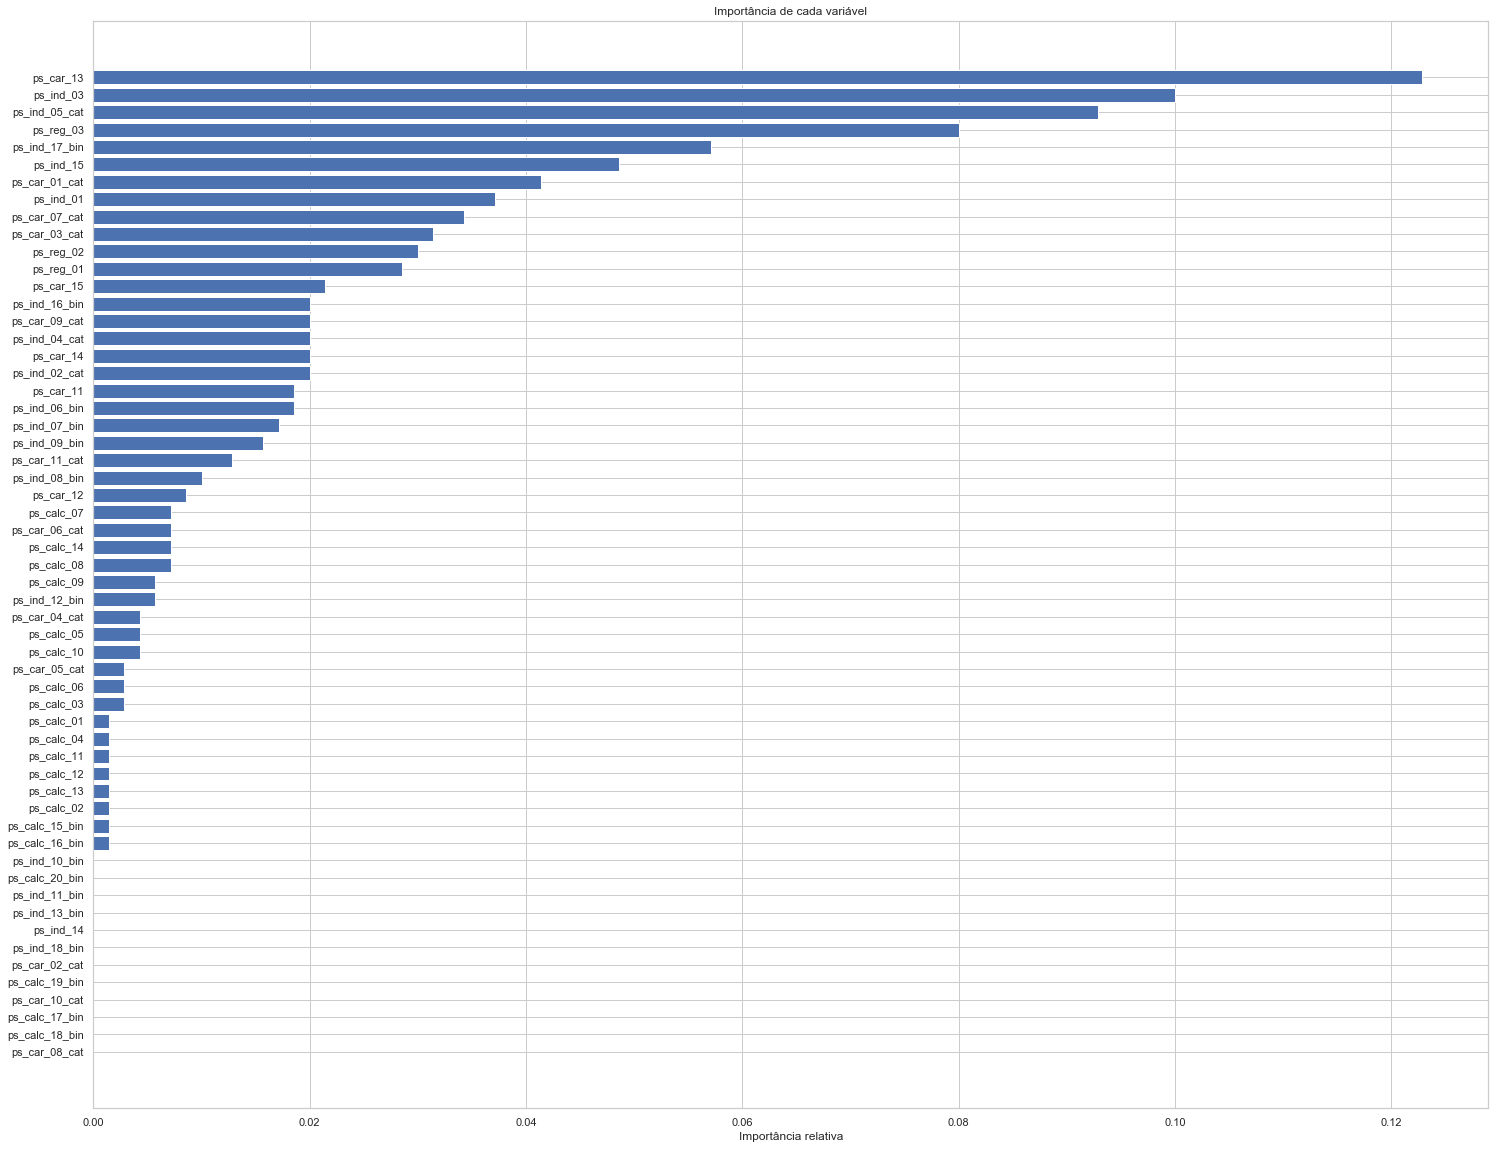

In [34]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set_style("whitegrid")
sns.set_palette("husl")


importances = model.feature_importances_
indices = np.argsort(importances)
features = X_treino.columns

plt.figure(1)
plt.title('Importância de cada variável')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância relativa')

# Comentários

Devemos usar o one hot encoder em todas as variáveis para torná-las binárias ???

Como otimizar os parâmetros

Devo utilizar log loss ???